<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/XPS_Spectrum/blob/main/XPS_Synthetic_5Portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Synthetic XPS Data Generation</h2>

<p>Author: <strong>Dr. Mehrdad Jalali</strong></p>

<h3>Component Data:</h3>

<table>
  <tr>
    <th>Component</th>
    <th>Binding energy (peak position, eV)</th>
    <th>FWHM, eV</th>
    <th>Ratio</th>
  </tr>
  <tr>
    <td>Silicon (Si)_Comp1</td>
    <td>99.0±0.1</td>
    <td>1.20±0.1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Silicon (Si)_Comp2</td>
    <td>99.6±0.1</td>
    <td>1.20±0.1</td>
    <td>0.5</td>
  </tr>
  <tr>
    <td>Silicon carbide (SiC)</td>
    <td>100.4±0.5</td>
    <td>1.65±0.1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Silicon nitride (SiN)</td>
    <td>101.6±0.3</td>
    <td>1.65±0.1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Silicon oxide (SiO2)</td>
    <td>103.1±0.3</td>
    <td>1.65±0.1</td>
    <td>1</td>
  </tr>
</table>

<p><strong>Note:</strong> The values are provided with their respective uncertainties. The "Ratio" column represents the relative intensity ratio of each component.</p>


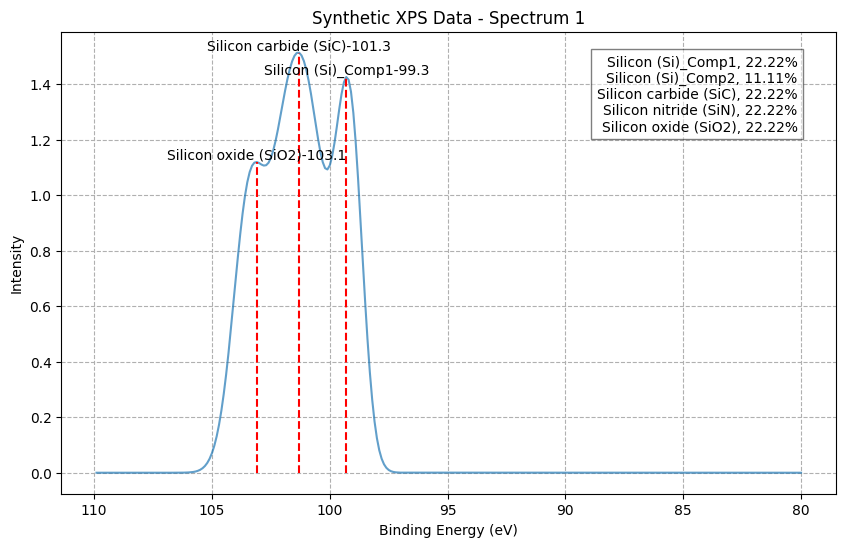

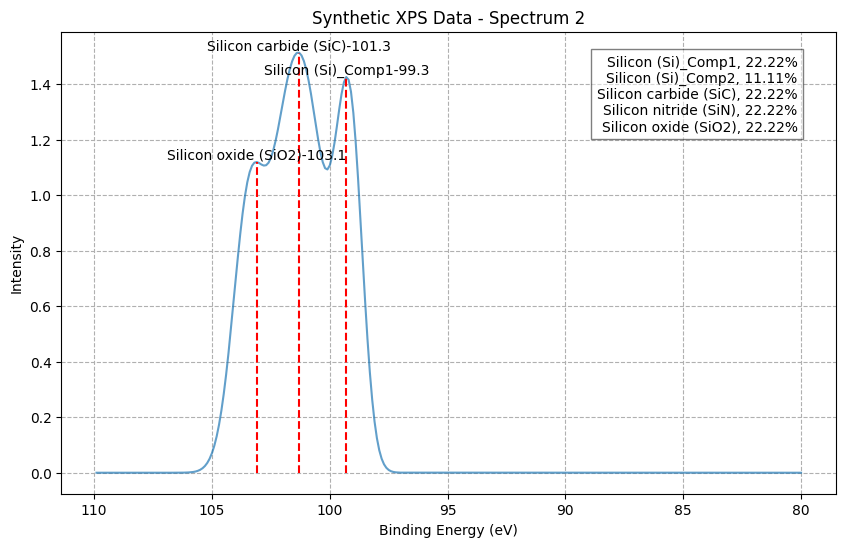

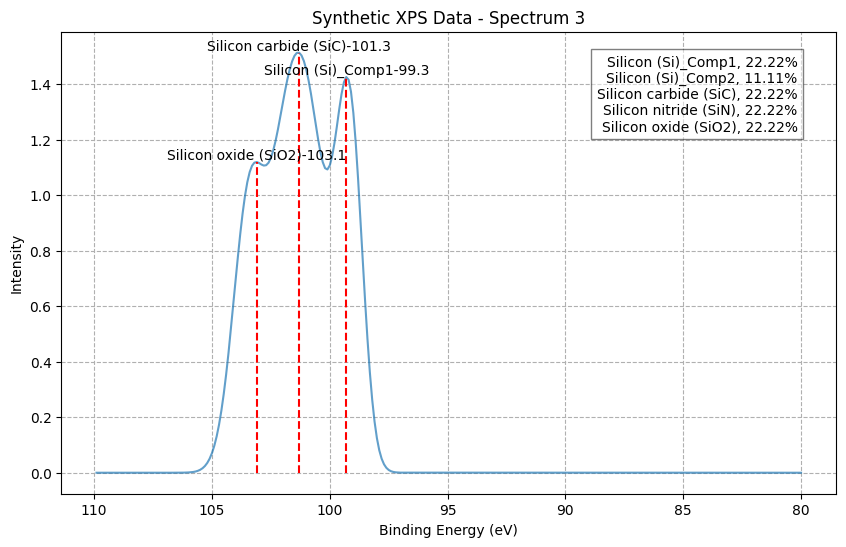

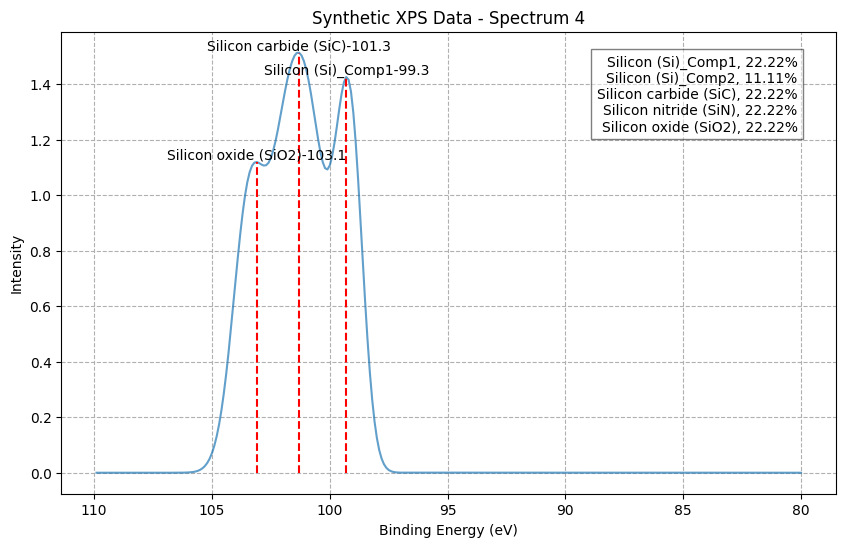

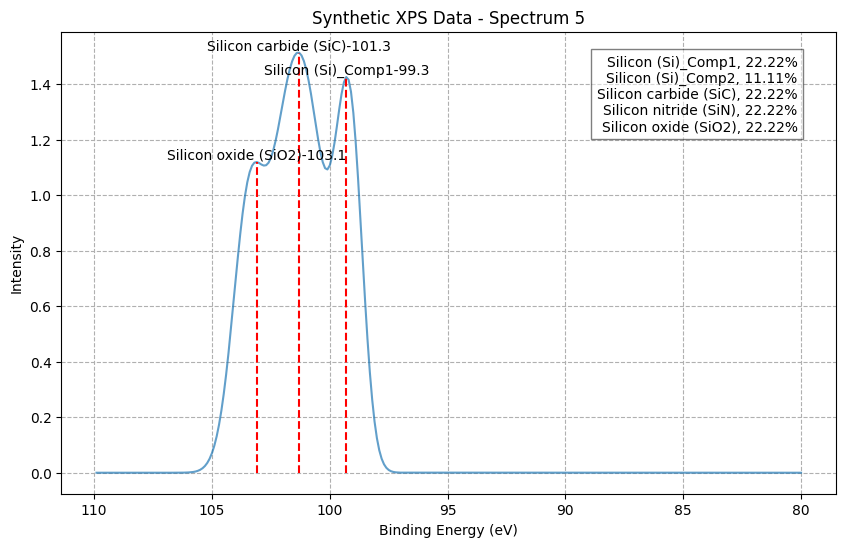

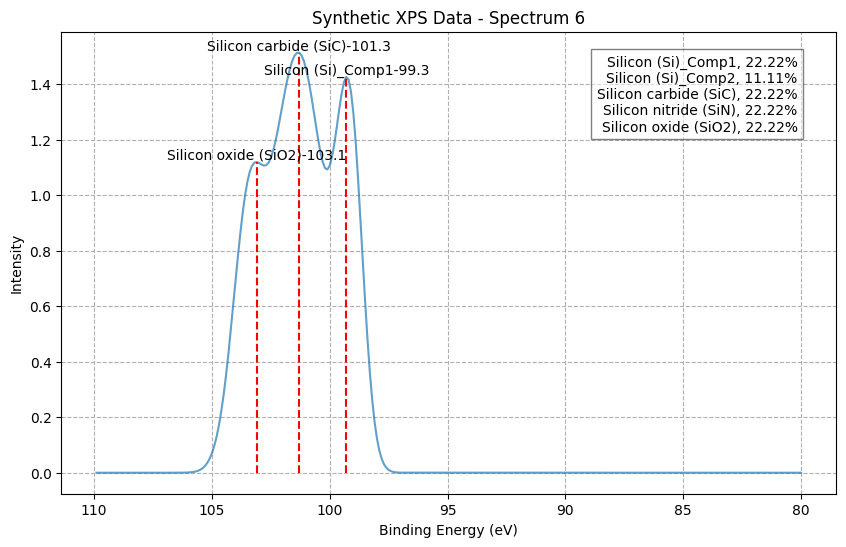

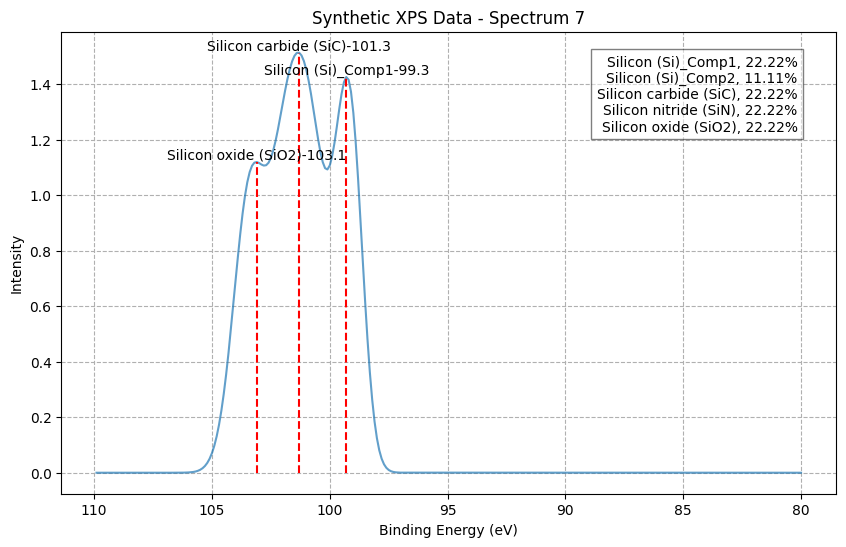

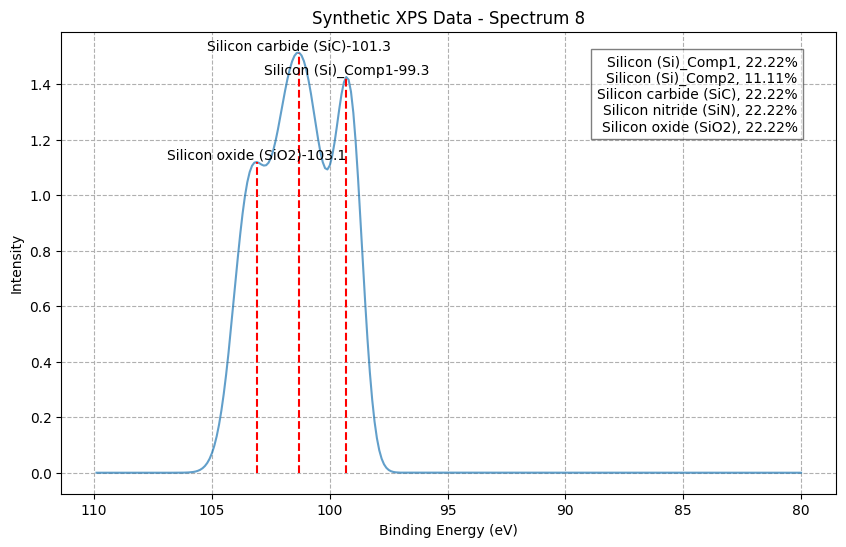

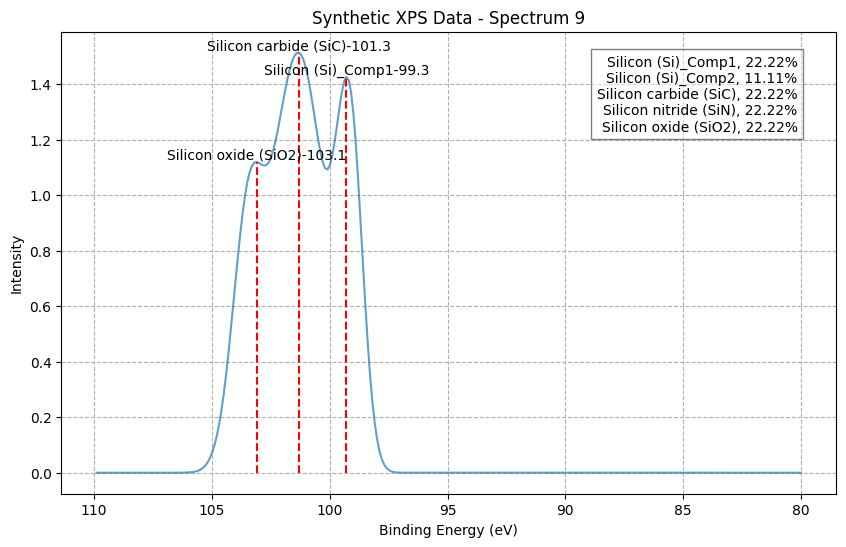

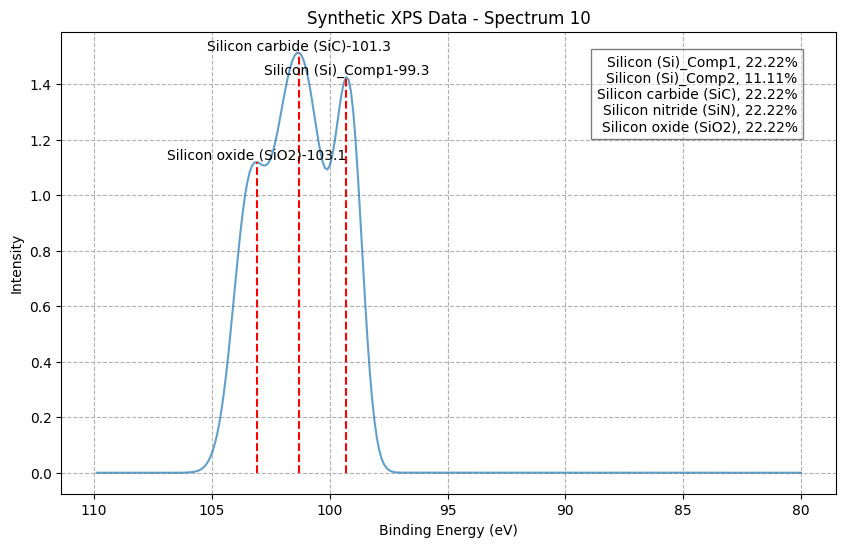

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Function to generate a spectrum as a sum of Gaussians
def generate_spectrum_sum_gaussians(amplitudes, centers, fwhms):
    x_range = np.arange(80, 110, 0.1)
    peaks = []
    for i in range(len(centers)):
        fwhm = fwhms[i]
        peak = amplitudes[i] * np.exp(-(x_range - centers[i])**2 / (2 * (fwhm / (2 * np.sqrt(2 * np.log(2)) ))**2))  # Gaussian peak with FWHM
        peaks.append(peak)
    return np.sum(peaks, axis=0)

# Adjusted specific frequencies with conditional random value additions
adjustedFrequencies = {
    99.0 + np.random.uniform(-0.1, 0.1): ('Silicon (Si)_Comp1', 1.20),
    99.0 + 0.6 + np.random.uniform(-0.1, 0.1): ('Silicon (Si)_Comp2', 1.20),
    100.4 + np.random.uniform(-0.5, 0.5): ('Silicon carbide (SiC)', 1.65),
    101.6 + np.random.uniform(-0.3, 0.3): ('Silicon nitride (SiN)', 1.65),
    103.1 + np.random.uniform(-0.3, 0.3): ('Silicon oxide (SiO2)', 1.65)
}

# Generate amplitudes for spectra data
num_amplitudes = len(adjustedFrequencies)  # Adjusted number of amplitudes
num_spectra = 10  # Number of spectra

# Extract centers and FWHM values
centers = [center for center, _ in adjustedFrequencies.items()]
fwhms = [fwhm for _, (_, fwhm) in adjustedFrequencies.items()]

# Generate and plot 10 spectra
for i in range(num_spectra):
    # Generate spectra data with corresponding amplitude vectors
    amplitudes = np.random.rand(num_amplitudes)  # Random amplitudes for each spectrum
   # Generate spectra data with corresponding amplitude vectors
    amplitudes = np.random.rand(num_amplitudes)  # Random amplitudes for each spectrum
    # Set the amplitude for Silicon (Si)_Comp1 according to ratio
    amplitudes[0] = 1.0
    # Set the amplitude for Silicon (Si)_Comp2 according to ratio
    amplitudes[1] = 0.5
    # Set the amplitudes for other components to ensure the ratio is 1
    for j in range(2, num_amplitudes):
         amplitudes[j] = 1.0

    spectrum = generate_spectrum_sum_gaussians(amplitudes, centers, fwhms)

    # Calculate the total amplitude for each label
    total_amplitude = {label: sum([amplitudes[i] for i, freq in enumerate(adjustedFrequencies.keys()) if adjustedFrequencies[freq][0] == label]) for label in ['Silicon (Si)_Comp1', 'Silicon (Si)_Comp2', 'Silicon carbide (SiC)', 'Silicon nitride (SiN)', 'Silicon oxide (SiO2)']}


    # Calculate the percentage of each label
    total_spectrum_amplitude = sum(amplitudes)
    percentage_label = {label: (total_amplitude[label] / total_spectrum_amplitude) * 100 for label in total_amplitude}

    # Plot synthetic spectra data
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(80, 110, 0.1), spectrum, alpha=0.7)

    # Find peaks in the spectrum
    peaks, _ = find_peaks(spectrum, height=0)

    # Plot peaks
    plt.vlines(x=np.arange(80, 110, 0.1)[peaks], ymin=0, ymax=spectrum[peaks], color='r', linestyle='--')

    # Annotate peaks with labels
    for peak, binding_energy in zip(peaks, np.arange(80, 110, 0.1)[peaks]):
        closest_frequency = min(adjustedFrequencies, key=lambda x: abs(x - np.arange(80, 110, 0.1)[peak]))
        label, _ = adjustedFrequencies[closest_frequency]
        plt.text(binding_energy, spectrum[peak], f"{label}-{binding_energy:.1f}", rotation=0, va='bottom', ha='center')

    # Create a text box to display specific frequencies and their corresponding percentages
    text_box_content = '\n'.join([f"{label}, {percentage:.2f}%" for label, percentage in percentage_label.items()])
    plt.text(0.95, 0.95, text_box_content, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel('Binding Energy (eV)')
    plt.ylabel('Intensity')
    plt.title(f'Synthetic XPS Data - Spectrum {i+1}')
    plt.grid(True, which="both", ls="--")
    plt.gca().invert_xaxis()  # Invert the x-axis
    plt.show()
